## Exercise question

In [42]:
import pypsa
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
import subprocess
from shapely.errors import ShapelyDeprecationWarning
import logging

#### 1) Creating a network

In [43]:
# Create a new PyPSA network
network = pypsa.Network()
network.set_snapshots(range(1))  # Solve for a year 365*24

#### 2) Add Buses

In [44]:
# Read excel file which contains Non renewable generators data
bus=pd.read_excel('data_exercise.xlsx',sheet_name='buses',header=0)

In [45]:
bus

,bus,v_nom,carrier,x,y
0,north_de,380,AC,9.598178,53.558527
1,east_de,380,AC,13.607776,51.076934
2,west_de,380,AC,6.802513,50.957803


In [46]:
network.madd(
    "Bus",
    names= bus.bus,
    v_nom=list(bus.v_nom),
    carrier=list(bus.carrier),
    x=list(bus.x),
    y=list(bus.y),
)
network.buses

,v_nom,carrier,x,y,type,unit,v_mag_pu_set,v_mag_pu_min,v_mag_pu_max,control,generator,sub_network
Bus,,,,,,,,,,,,
north_de,380.0,AC,9.598178,53.558527,,,1.0,0.0,inf,PQ,,
east_de,380.0,AC,13.607776,51.076934,,,1.0,0.0,inf,PQ,,
west_de,380.0,AC,6.802513,50.957803,,,1.0,0.0,inf,PQ,,


### 3) Add generators

In [47]:
# Read excel file which contains Non renewable generators data
generators=pd.read_excel('data_exercise.xlsx',sheet_name='generators')

In [48]:
generators

,generator,p_nom,p_nom_max,bus,p_nom_extendable,marginal_cost,lifetime,efficiency,start_up_cost,shut_down_cost,min_up_time,min_down_time,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down
0,gen_no1,15,NaN,north_de,False,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,gen_no2,16,NaN,north_de,False,15,NaN,NaN,NaN,NaN,4.0,3.0,0.54,0.75,NaN,NaN
2,gen_no3,9,NaN,north_de,False,30,NaN,NaN,NaN,NaN,2.0,2.0,0.75,0.75,NaN,NaN
3,gen_ost1,10,NaN,east_de,False,15,NaN,NaN,NaN,NaN,2.0,2.0,0.75,0.75,NaN,NaN
4,gen_ost2,9,NaN,east_de,False,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,gen_ost3,5,NaN,east_de,False,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,gen_west1,30,NaN,west_de,False,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,gen_west2,10,NaN,west_de,False,40,NaN,NaN,NaN,NaN,2.0,2.0,0.75,0.75,NaN,NaN
8,gen_west3,15,NaN,west_de,False,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
network.madd(
    "Generator",
    names= generators.generator,
    bus=list(generators.bus),
    carrier=list(generators.generator),
    p_nom=list(generators.p_nom),
    p_nom_extendable=list(generators.p_nom_extendable),
    marginal_cost=list(generators.marginal_cost),
)
network.generators

,bus,carrier,p_nom,p_nom_extendable,marginal_cost,control,type,p_nom_mod,p_nom_min,p_nom_max,...,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,weight,p_nom_opt
Generator,,,,,,,,,,,,,,,,,,,,,
gen_no1,north_de,gen_no1,15.0,False,10.0,PQ,,0.0,0.0,inf,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
gen_no2,north_de,gen_no2,16.0,False,15.0,PQ,,0.0,0.0,inf,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
gen_no3,north_de,gen_no3,9.0,False,30.0,PQ,,0.0,0.0,inf,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
gen_ost1,east_de,gen_ost1,10.0,False,15.0,PQ,,0.0,0.0,inf,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
gen_ost2,east_de,gen_ost2,9.0,False,20.0,PQ,,0.0,0.0,inf,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
gen_ost3,east_de,gen_ost3,5.0,False,35.0,PQ,,0.0,0.0,inf,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
gen_west1,west_de,gen_west1,30.0,False,25.0,PQ,,0.0,0.0,inf,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
gen_west2,west_de,gen_west2,10.0,False,40.0,PQ,,0.0,0.0,inf,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
gen_west3,west_de,gen_west3,15.0,False,45.0,PQ,,0.0,0.0,inf,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0


### 4) Add load

In [50]:
# Read excel file which contains Non renewable generators data
load=pd.read_excel('data_exercise.xlsx',sheet_name='load',header=0)

In [51]:
load

,bus,p_set
0,north_de,10
1,east_de,10
2,west_de,40


In [52]:
network.madd(
    "Load",
    names= load.bus,
    bus=list(load.bus),
    p_set=list(load.p_set),

)
network.loads

,bus,p_set,carrier,type,q_set,sign
Load,,,,,,
north_de,north_de,10.0,,,0.0,-1.0
east_de,east_de,10.0,,,0.0,-1.0
west_de,west_de,40.0,,,0.0,-1.0


### 5) Add transmission lines

In [53]:
# Read excel file which contains Non renewable generators data
lines=pd.read_excel('data_exercise.xlsx',sheet_name='lines',header=0)
lines

,line,bus0,bus1,s_nom,r,x
0,1,north_de,east_de,500,0.0001,0.0001
1,2,east_de,west_de,500,0.0001,0.0001
2,3,west_de,north_de,500,0.0001,0.0001


In [54]:
network.madd(
    "Line",
    names= lines.line,
    bus0=list(lines.bus0),
    bus1=list(lines.bus1),
    s_nom=list(lines.s_nom),
    r=list(lines.r),
    x=list(lines.x),
)
network.lines

,bus0,bus1,s_nom,r,x,type,g,b,s_nom_mod,s_nom_extendable,...,v_ang_min,v_ang_max,sub_network,x_pu,r_pu,g_pu,b_pu,x_pu_eff,r_pu_eff,s_nom_opt
Line,,,,,,,,,,,,,,,,,,,,,
1,north_de,east_de,500.0,0.0001,0.0001,,0.0,0.0,0.0,False,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,east_de,west_de,500.0,0.0001,0.0001,,0.0,0.0,0.0,False,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,west_de,north_de,500.0,0.0001,0.0001,,0.0,0.0,0.0,False,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
network

PyPSA Network
Components:
 - Bus: 3
 - Generator: 9
 - Line: 3
 - Load: 3
Snapshots: 1

In [56]:
network.optimize(solver_name='highs')

c:\Users\par19744\.conda\envs\PyPSA\Lib\site-packages\linopy\expressions.py:515: FutureWarning:

The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.

c:\Users\par19744\.conda\envs\PyPSA\Lib\site-packages\linopy\expressions.py:515: FutureWarning:

The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.

c:\Users\par19744\.conda\envs\PyPSA\Lib\site-packages\linopy\expressions.py:519: FutureWarning:

The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.

c:\Users\par1

('ok', 'optimal')

In [57]:
network.statistics()

Optimal Capacity  Installed Capacity  Capacity Factor  \
Generator gen_no1                15.0                15.0         1.000000   
          gen_no2                16.0                16.0         1.000000   
          gen_no3                 9.0                 9.0         0.000000   
          gen_ost1               10.0                10.0         1.000000   
          gen_ost2                9.0                 9.0         1.000000   
          gen_ost3                5.0                 5.0         0.000000   
          gen_west1              30.0                30.0         0.333333   
          gen_west2              10.0                10.0         0.000000   
          gen_west3              15.0                15.0         0.000000   
Line      AC                   1500.0              1500.0         0.022667   
Load      -                       0.0                 0.0              NaN   

                     Dispatch  Transmission  Withdrawal  Supply  Curtailment  \
Generator gen_no1        15.0           0.0         0.0    15.0          0.0   
          gen_no2        16.0           0.0         0.0    16.0          0.0   
          gen_no3         0.0           0.0         0.0     0.0          0.0   
          gen_ost1       10.0           0.0         0.0    10.0          0.0   
          gen_ost2        9.0           0.0         0.0     9.0          0.0   
          gen_ost3        0.0           0.0         0.0     0.0          0.0   
          gen_west1      10.0           0.0         0.0    10.0          0.0   
          gen_west2       0.0           0.0         0.0     0.0          0.0   
          gen_west3       0.0           0.0         0.0     0.0          0.0   
Line      AC              0.0           0.0        34.0    34.0          0.0   
Load      -             -60.0           0.0        60.0     0.0          0.0   

                     Capital Expenditure  Operational Expenditure  Revenue  \
Generator gen_no1                    0.0                    150.0    375.0   
          gen_no2                    0.0                    240.0    400.0   
          gen_no3                    0.0                      0.0      0.0   
          gen_ost1                   0.0                    150.0    250.0   
          gen_ost2                   0.0                    180.0    225.0   
          gen_ost3                   0.0                      0.0      0.0   
          gen_west1                  0.0                    250.0    250.0   
          gen_west2                  0.0                      0.0      0.0   
          gen_west3                  0.0                      0.0      0.0   
Line      AC                         0.0                      0.0      0.0   
Load      -                          0.0                      0.0  -1500.0   

                     Market Value  
Generator gen_no1            25.0  
          gen_no2            25.0  
          gen_no3             0.0  
          gen_ost1           25.0  
          gen_ost2           25.0  
          gen_ost3            0.0  
          gen_west1          25.0  
          gen_west2           0.0  
          gen_west3           0.0  
Line      AC                  NaN  
Load      -                   NaN

In [58]:
network.buses_t.marginal_price

Bus,north_de,east_de,west_de
snapshot,,,
0,25.0,25.0,25.0


<Axes: xlabel='snapshot', ylabel='MW'>

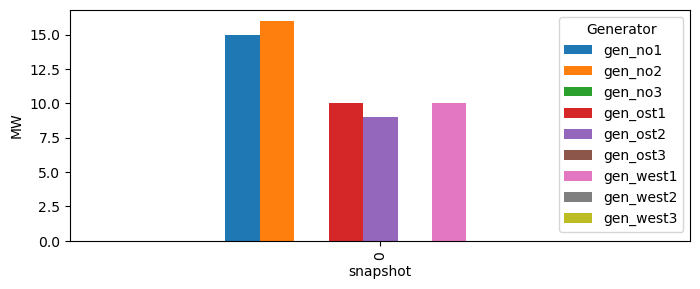

In [66]:
network.generators_t.p.plot.bar(ylabel="MW", figsize=(8, 3))

In [67]:
network.generators_t.p

Generator,gen_no1,gen_no2,gen_no3,gen_ost1,gen_ost2,gen_ost3,gen_west1,gen_west2,gen_west3
snapshot,,,,,,,,,
0,15.0,16.0,-0.0,10.0,9.0,-0.0,10.0,-0.0,-0.0
